# Reading and Plotting Processed CSV Data

If you do not already have __pyEcholab__ installed, use the following pip command in the terminal to install it:
```
pip install git+https://github.com/CI-CMG/pyEcholab.git
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import s3fs
import boto3, botocore
from botocore import UNSIGNED
from botocore.client import Config

s3 = boto3.resource(
    's3',
    aws_access_key_id='',
    aws_secret_access_key='',
    config=Config(signature_version=UNSIGNED)
)

BUCKET = 'ncei-wcsd-archive'

The column header for the CSV files includes all the following:

1. Ping_index
1. Distance_gps
1. Distance_vl
1. Ping_date
1. Ping_time
1. Ping_milliseconds
1. Latitude
1. Longitude
1. Depth_start
1. Depth_stop
1. Range_start
1. Range_stop
1. Sample_count
1. Data --> 1000 data samples

In [2]:
file = 's3://' + BUCKET + '/data/processed/SH1305/18kHz/SaKe2013-D20130523-T080854_to_SaKe2013-D20130523-T085643.csv'

print(file)

s3://ncei-wcsd-archive/data/processed/SH1305/18kHz/SaKe2013-D20130523-T080854_to_SaKe2013-D20130523-T085643.csv


In [3]:
df18 = pd.read_csv(file, header=None, na_values=['-9.9e+37',' -9.9e+37'], skiprows=1)

print('type:', type(df18))

dd18 = df18.iloc[:, 13:1013].to_numpy()

print('type:', type(dd18))

type: <class 'pandas.core.frame.DataFrame'>
type: <class 'numpy.ndarray'>


(2548, 1000)


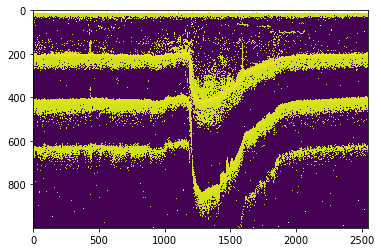

In [4]:
from matplotlib import pyplot as plt

print(dd18.shape)
plt.imshow(np.rot90(dd18, k=3), aspect='auto')

plt.show()